In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
0,75.857869,39.355313,12.446199,48.521092,76.708380,116.689707,172.241171,190.335126,189.275727,193.593081,...,228.0,254.0,20.0,1.0,0.0,253.0,1.0,5.0,251.0,0
1,108.986315,76.130283,71.552523,96.741394,134.743133,177.721123,192.407972,209.790557,215.140828,212.508728,...,211.0,34.0,34.0,211.0,17.0,65.0,64.0,10.0,25.0,0
2,47.322789,56.577812,58.083601,80.822761,109.154820,132.292485,151.029829,169.915817,171.714724,175.973191,...,35.0,33.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,53.470163,22.849971,26.938194,43.946841,42.827509,58.186759,81.299248,78.942837,88.754521,95.357442,...,190.0,55.0,61.0,21.0,27.0,194.0,228.0,72.0,0.0,0
4,20.134835,31.233098,49.724754,55.012206,55.027556,44.086222,56.072698,95.572997,84.811791,121.987502,...,242.0,5.0,251.0,6.0,228.0,251.0,4.0,244.0,1.0,0


In [4]:
df.shape

(188, 2049)

In [5]:
x = df.drop('label',axis = 1).values
y = df['label'].values

In [6]:
x.shape

(188, 2048)

In [7]:
y.shape

(188,)

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,stratify= y, random_state = 33)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
xtrain1 = scalar.fit_transform(xtrain)
xtest1 = scalar.fit_transform(xtest)

In [10]:
np.unique(ytrain)

array([0, 1, 2, 3, 4], dtype=int64)

In [11]:
model = keras.Sequential([
    keras.layers.Reshape((32, 32, 2), input_shape=(2048,)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
                        ])

In [12]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

In [13]:
history = model.fit(xtrain1,ytrain,epochs = 20)

Epoch 1/20
5/5 [==============================] - 8s 52ms/step - loss: 1.5924 - accuracy: 0.2733
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 1.5625 - accuracy: 0.3000
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 1.5348 - accuracy: 0.3000
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 1.5056 - accuracy: 0.3067
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 1.4790 - accuracy: 0.3600
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 1.4191 - accuracy: 0.4000
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 1.3406 - accuracy: 0.5133
Epoch 8/20
5/5 [==============================] - 0s 7ms/step - loss: 1.2948 - accuracy: 0.4467
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 1.2004 - accuracy: 0.6333
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 1.1055 - accuracy: 0.5200
Epoch 11/20
5/5 [===================

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

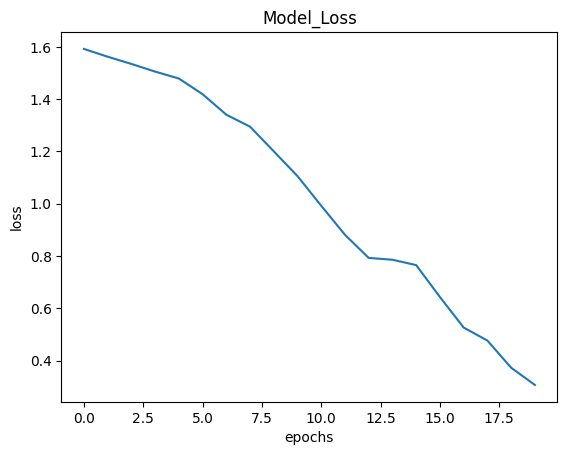

In [17]:
plt.plot(history.history['loss'])
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

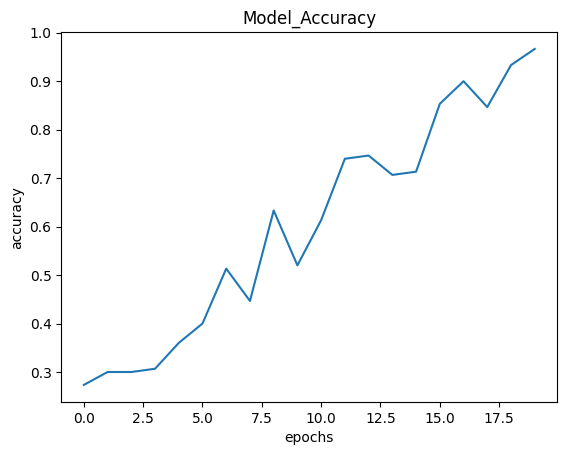

In [18]:
plt.plot(history.history['accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

In [20]:
model.evaluate(xtest1,ytest)

2/2 [==============================] - 1s 269ms/step - loss: 1.5364 - accuracy: 0.4211


[1.5364296436309814, 0.42105263471603394]

model accuracy is low because of limited data...we can increase this accuracy and reduce overfitting by adding dropout layers